In [1]:
import numpy
import scipy
from matplotlib import pyplot
from mpl_toolkits.basemap import Basemap
import matplotlib.colors
nicebwr = matplotlib.colors.LinearSegmentedColormap.from_list("nicebwr",["#094da0","#FFFFFF","#ef1a2d"])
import scha

import importlib
importlib.reload(scha)

cos = numpy.cos; sin = numpy.sin

%matplotlib nbagg

In [2]:
datos = numpy.loadtxt("/home/josecper/Programs/data/scha/pruebas/output.dat",
                      usecols=(1, 2, 7, 8, 9)).T

thetav = numpy.deg2rad(90 - datos[0])
phiv = numpy.deg2rad(datos[1])

theta_c, phi_c, theta_0d, theta_0 = numpy.deg2rad((90-45.0, 15.0, 20.0, 50.0))

rot_mat = scha.rotation_matrix(theta_c, phi_c, invert=True)
r, theta_r, phi_r = scha.rotate_coords(1.0, thetav, phiv, rot_mat)

#datos originales, rotados por javi
#Bx, By, Bz = datos[2:]

Bx_o, By_o, Bz_o = numpy.loadtxt("/home/josecper/Programs/data/scha/pruebas/output.dat",
                      usecols=(4, 5, 6)).T

Bx_r = numpy.empty_like(Bx_o); By_r = numpy.empty_like(By_o); Bz_r = numpy.empty_like(Bz_o)

for i, (xx, yy, zz, th_i, phi_i, th_ri) in enumerate(zip(Bx_o,By_o,Bz_o,thetav,phiv,theta_r)):
    #x_r[i], y_r[i], z_r[i] = scha.rotate_vector(xx, yy, zz, th_p, ph_p, th_i, phi_i, th_ri)
    Bx_r[i], By_r[i], Bz_r[i] = scha.rotate_vector(xx, yy, zz, theta_c, phi_c,
                                                   th_i, phi_i, th_ri)

In [3]:
ms = numpy.arange(0, 8);
roots = scha.degree(ms, theta0 = theta_0, max_k = 7)
k, m, n = scha.join_roots(roots)

In [4]:
importlib.reload(scha)
gp=scha.invert_xyz(theta_r, phi_r, Bx_r, By_r, Bz_r, (k, m, n), reg_coef=0.00, theta_0 = theta_0)
Bx_inv, By_inv, Bz_inv = scha.xyzfield(k, m, n, gp, theta_r, phi_r)

<IPython.core.display.Javascript object>


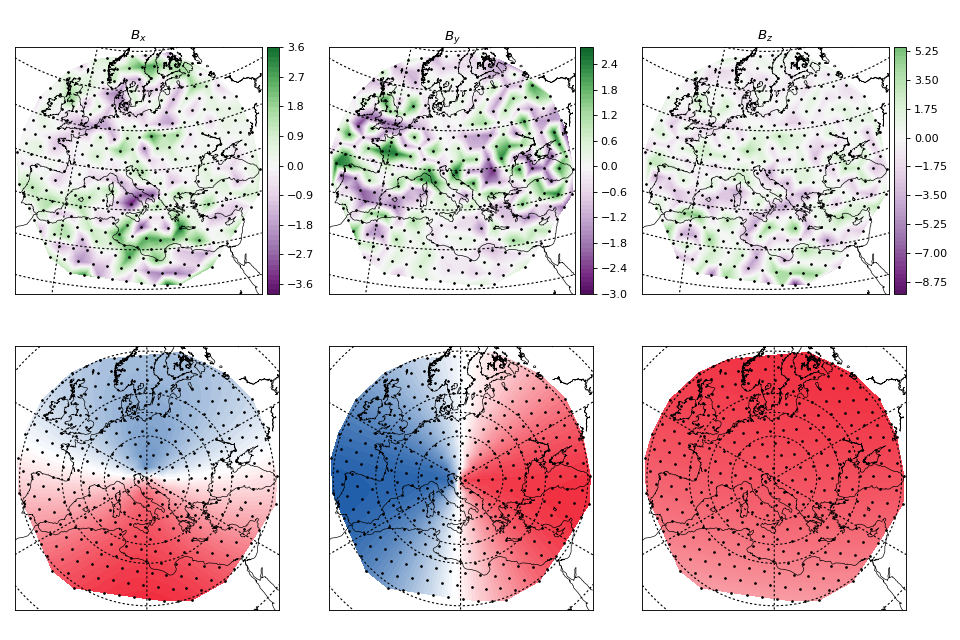

/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [5]:
fig, axes = pyplot.subplots(2, 3, figsize=(12,8))

base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-20)
base2 = Basemap(projection="aeqd", lon_0 = 15.0, lat_0=45.0, lat_ts=45.0,
                width=base.xmax, height=base.ymax, resolution="l")
#scha.polar_contour(Bx_r, theta_r, phi_r, theta_0, ax=ax, resolution=200, base=base)
base.colorbar(scha.polar_tricontour(Bx_inv-Bx_r, theta_r, phi_r, theta_0, ax=axes[0][0], base=base, cmap="PRGn"),ax=axes[0][0])
base.colorbar(scha.polar_tricontour(By_inv-By_r, theta_r, phi_r, theta_0, ax=axes[0][1], base=base, cmap="PRGn"),ax=axes[0][1])
base.colorbar(scha.polar_tricontour(Bz_inv-Bz_r, theta_r, phi_r, theta_0, ax=axes[0][2], base=base, cmap="PRGn"),ax=axes[0][2])

axes[0][0].set_title("$B_{x}$")
axes[0][1].set_title("$B_{y}$")
axes[0][2].set_title("$B_{z}$")

scha.polar_tricontour(Bx_inv, theta_r, phi_r, theta_0, ax=axes[1][0], base=base, cmap=nicebwr)
scha.polar_tricontour(By_inv, theta_r, phi_r, theta_0, ax=axes[1][1], base=base, cmap=nicebwr)
scha.polar_tricontour(Bz_inv, theta_r, phi_r, theta_0, ax=axes[1][2], base=base, cmap=nicebwr)

for ax in axes[0]:
    base2.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base2.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)
    
for ax in axes[1]:
    base.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)

fig.tight_layout()
pyplot.show(fig)

histogramos

In [6]:
Bx_res_freq, Bx_res_hist = numpy.histogram(Bx_inv-Bx_r)
By_res_freq, By_res_hist = numpy.histogram(By_inv-By_r)
Bz_res_freq, Bz_res_hist = numpy.histogram(Bz_inv-Bz_r)

<IPython.core.display.Javascript object>


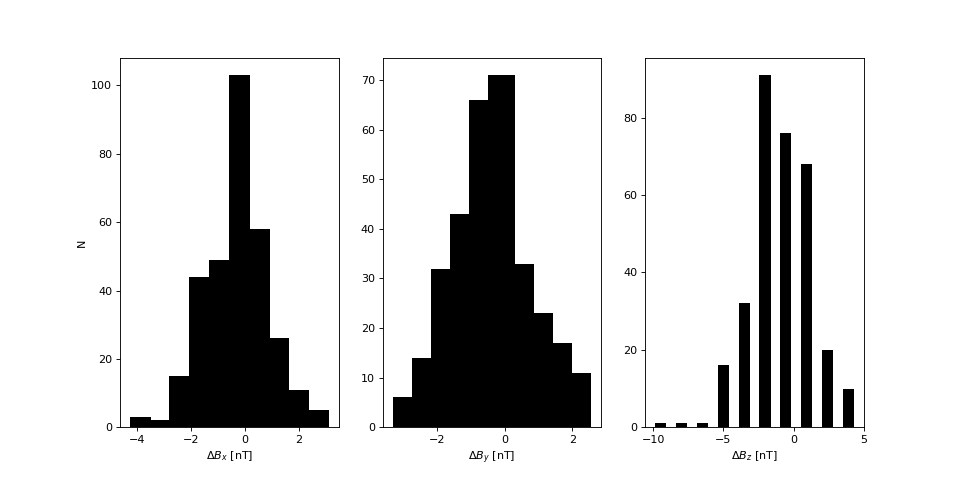

In [7]:
fig, (ax_x, ax_y, ax_z) = pyplot.subplots(1, 3, figsize=(12, 6))

ax_x.bar(Bx_res_hist[:-1], Bx_res_freq, color="black"); ax_x.set_xlabel("$\Delta B_{x}$ [nT]"); ax_x.set_ylabel("N")
ax_y.bar(By_res_hist[:-1], By_res_freq, color="black"); ax_y.set_xlabel("$\Delta B_{y}$ [nT]")
ax_z.bar(Bz_res_hist[:-1], Bz_res_freq, color="black"); ax_z.set_xlabel("$\Delta B_{z}$ [nT]")

pyplot.show(fig)

In [8]:
importlib.reload(scha)
gp=scha.invert_xyz(theta_r, phi_r, Bx_r, By_r, Bz_r, (k, m, n), reg_coef=0.0001, theta_0 = theta_0)
Bx_inv, By_inv, Bz_inv = scha.xyzfield(k, m, n, gp, theta_r, phi_r)

<IPython.core.display.Javascript object>


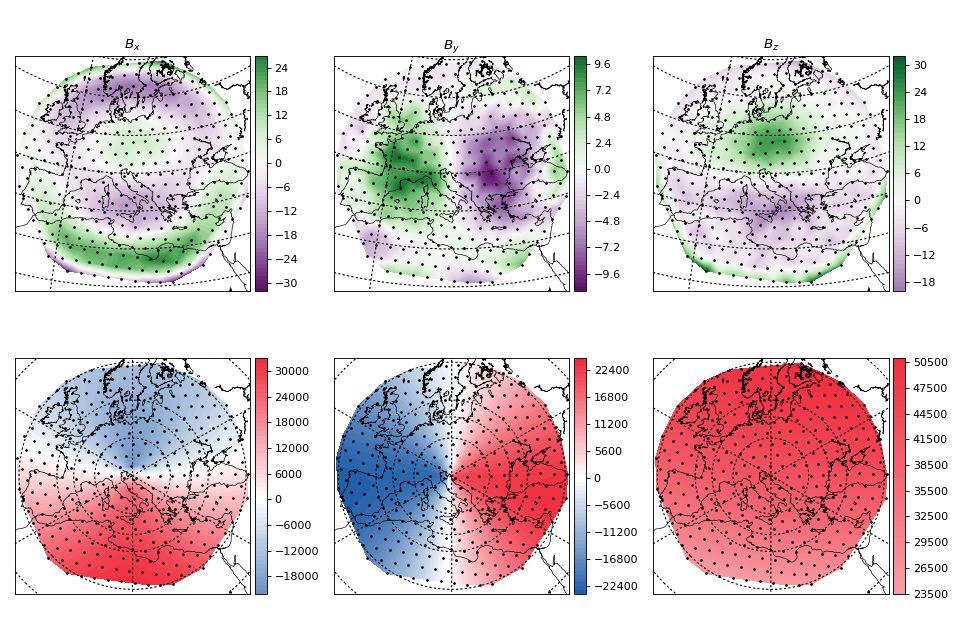

/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


In [9]:
fig, axes = pyplot.subplots(2, 3, figsize=(12,8))

base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-20)
base2 = Basemap(projection="aeqd", lon_0 = 15.0, lat_0=45.0, lat_ts=45.0,
                width=base.xmax, height=base.ymax, resolution="l")
#scha.polar_contour(Bx_r, theta_r, phi_r, theta_0, ax=ax, resolution=200, base=base)
base.colorbar(scha.polar_tricontour(Bx_inv-Bx_r, theta_r, phi_r, theta_0, ax=axes[0][0], base=base, cmap="PRGn"),ax=axes[0][0])
base.colorbar(scha.polar_tricontour(By_inv-By_r, theta_r, phi_r, theta_0, ax=axes[0][1], base=base, cmap="PRGn"),ax=axes[0][1])
base.colorbar(scha.polar_tricontour(Bz_inv-Bz_r, theta_r, phi_r, theta_0, ax=axes[0][2], base=base, cmap="PRGn"),ax=axes[0][2])

axes[0][0].set_title("$B_{x}$")
axes[0][1].set_title("$B_{y}$")
axes[0][2].set_title("$B_{z}$")

base.colorbar(scha.polar_tricontour(Bx_inv, theta_r, phi_r, theta_0, ax=axes[1][0], base=base, cmap=nicebwr), ax=axes[1][0])
base.colorbar(scha.polar_tricontour(By_inv, theta_r, phi_r, theta_0, ax=axes[1][1], base=base, cmap=nicebwr), ax=axes[1][1])
base.colorbar(scha.polar_tricontour(Bz_inv, theta_r, phi_r, theta_0, ax=axes[1][2], base=base, cmap=nicebwr), ax=axes[1][2])

for ax in axes[0]:
    base2.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base2.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)
    
for ax in axes[1]:
    base.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)

fig.tight_layout()
pyplot.show(fig)

vaya, parece que sigue estando ahí el problema del casquete pequeño.

In [83]:
import rscha; importlib.reload(rscha.mehler); importlib.reload(rscha)

ms = numpy.arange(0, 7);
roots = scha.degree(ms, theta0 = theta_0d, max_k = 6)
k, m, n = scha.join_roots(roots)

k, m, n = numpy.array((k, m, n))
km_even = ((k-numpy.abs(m)) % 2 == 0) & (k <= 6)
#km_odd = ((k-numpy.abs(m)) % 2 != 0) & (k <= 7)
#m_mehler = numpy.array((0, 1, -1, 2, -2, 3, -3, 4, -4, 5, -5, 6, -6, 7, -7, 8, -8, 9, -9))
m_mehler= numpy.array((0, 1, -1, 2, -2))#m_mehler = numpy.array((0, 1, -1))
#m_mehler = numpy.array(())

k_even, m_even, n_even = k[km_even], m[km_even], n[km_even]
#you are entering the domain of murder
#k_odd, m_odd, n_odd = k[km_odd], m[km_odd], n[km_odd]
#k_double, m_double, n_double = numpy.concatenate(((k_even, m_even, n_even), (k_even, m_even, n_even)), axis=1)

#gp=rscha.invert_xyz(theta_r, phi_r, Bx_r, By_r, Bz_r, (k_even, m_even, n_even), m_mehler, theta_0d)
#Bx_inv, By_inv, Bz_inv = rscha.synth_field((k_even, m_even, n_even), m_mehler, gp, theta_r, phi_r, theta_0d)

gp=rscha.invert_xyz(theta_r, phi_r, Bx_r, By_r, Bz_r, (k_even, m_even, n_even), m_mehler, theta_0d)
#gp=rscha.invert_xyz(theta_r, phi_r, Bx_r, By_r, Bz_r, (k, m, n), m_mehler, theta_0)
#gp=rscha.invert_xyz(theta_r, phi_r, Bx_r, By_r, Bz_r, (k_double, m_double, n_double), m_mehler, theta_0d)

Bx_inv, By_inv, Bz_inv = rscha.synth_field((k_even, m_even, n_even), m_mehler, gp, theta_r, phi_r, theta_0d)
#Bx_inv, By_inv, Bz_inv = rscha.synth_field((k, m, n), m_mehler, gp, theta_r, phi_r, theta_0)
#Bx_inv, By_inv, Bz_inv = rscha.synth_field((k_double, m_double, n_double),m_mehler, gp, theta_r, phi_r, theta_0d)

In [ ]:
B_inv_rr = 

<IPython.core.display.Javascript object>


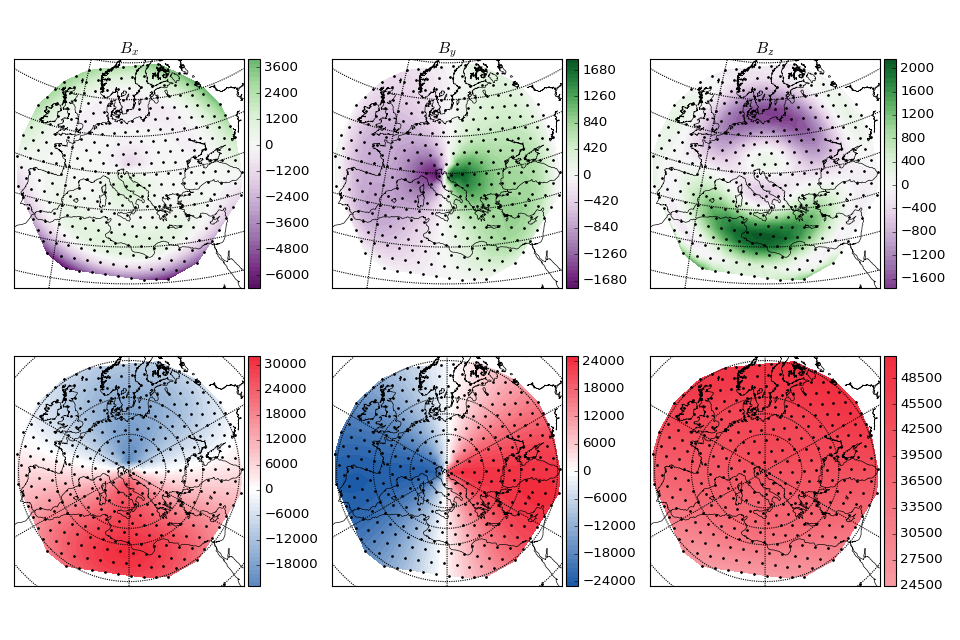

In [84]:
fig, axes = pyplot.subplots(2, 3, figsize=(12,8))

base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-20)
base2 = Basemap(projection="aeqd", lon_0 = 15.0, lat_0=45.0, lat_ts=45.0,
                width=base.xmax, height=base.ymax, resolution="l")
#scha.polar_contour(Bx_r, theta_r, phi_r, theta_0, ax=ax, resolution=200, base=base)
base.colorbar(scha.polar_tricontour(Bx_inv-Bx_r, theta_r, phi_r, theta_0, ax=axes[0][0], base=base, cmap="PRGn"),ax=axes[0][0])
base.colorbar(scha.polar_tricontour(By_inv-By_r, theta_r, phi_r, theta_0, ax=axes[0][1], base=base, cmap="PRGn"),ax=axes[0][1])
base.colorbar(scha.polar_tricontour(Bz_inv-Bz_r, theta_r, phi_r, theta_0, ax=axes[0][2], base=base, cmap="PRGn"),ax=axes[0][2])

axes[0][0].set_title("$B_{x}$")
axes[0][1].set_title("$B_{y}$")
axes[0][2].set_title("$B_{z}$")

base.colorbar(scha.polar_tricontour(Bx_inv, theta_r, phi_r, theta_0, ax=axes[1][0], base=base, cmap=nicebwr), ax=axes[1][0])
base.colorbar(scha.polar_tricontour(By_inv, theta_r, phi_r, theta_0, ax=axes[1][1], base=base, cmap=nicebwr), ax=axes[1][1])
base.colorbar(scha.polar_tricontour(Bz_inv, theta_r, phi_r, theta_0, ax=axes[1][2], base=base, cmap=nicebwr), ax=axes[1][2])

for ax in axes[0]:
    base2.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base2.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)
    
for ax in axes[1]:
    base.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)

fig.tight_layout()
pyplot.show(fig)

#### ahora con el DIF

In [12]:
import xyzfield, rscha
D_o, I_r, F_r, H_r = xyzfield.xyz2difh(Bx_o, By_o, Bz_o)
D_r = scha.rotate_declination(D_o, theta_c, phi_c, thetav, phiv, theta_r)

In [13]:
importlib.reload(rscha)
gp=rscha.invert_dif(theta_r, phi_r, D_r, I_r, F_r, (k_even, m_even, n_even), m_mehler, theta_0d, g0 = -40000)
Bx_inv, By_inv, Bz_inv = rscha.synth_field((k_even, m_even, n_even), m_mehler, gp, theta_r, phi_r, theta_0d)

NameError: name 'k_even' is not defined

<IPython.core.display.Javascript object>


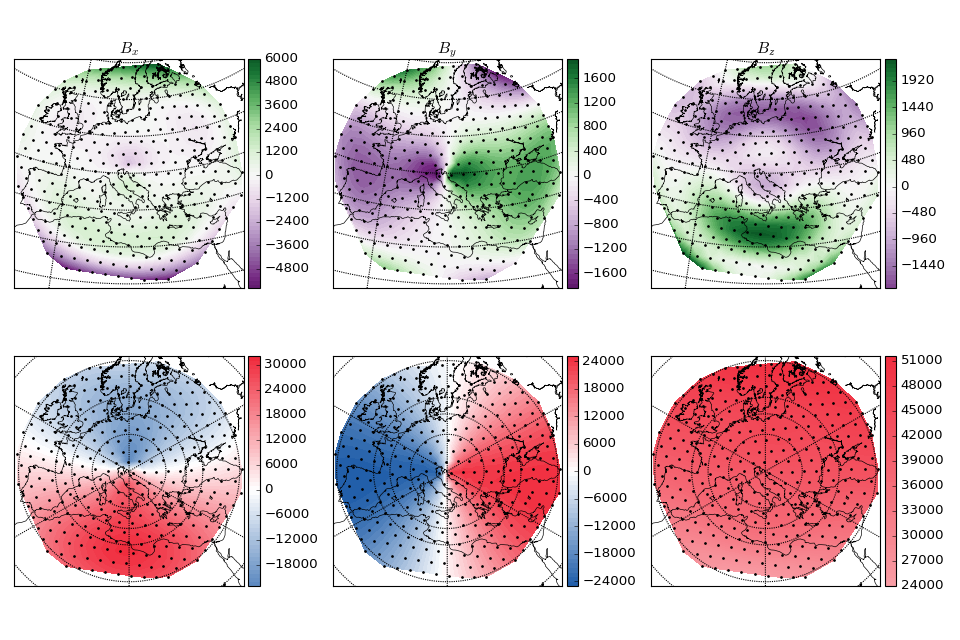

In [71]:
fig, axes = pyplot.subplots(2, 3, figsize=(12,8))

base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-20)
base2 = Basemap(projection="aeqd", lon_0 = 15.0, lat_0=45.0, lat_ts=45.0,
                width=base.xmax, height=base.ymax, resolution="l")
#scha.polar_contour(Bx_r, theta_r, phi_r, theta_0, ax=ax, resolution=200, base=base)
base.colorbar(scha.polar_tricontour(Bx_inv-Bx_r, theta_r, phi_r, theta_0, ax=axes[0][0], base=base, cmap="PRGn"),ax=axes[0][0])
base.colorbar(scha.polar_tricontour(By_inv-By_r, theta_r, phi_r, theta_0, ax=axes[0][1], base=base, cmap="PRGn"),ax=axes[0][1])
base.colorbar(scha.polar_tricontour(Bz_inv-Bz_r, theta_r, phi_r, theta_0, ax=axes[0][2], base=base, cmap="PRGn"),ax=axes[0][2])

axes[0][0].set_title("$B_{x}$")
axes[0][1].set_title("$B_{y}$")
axes[0][2].set_title("$B_{z}$")

base.colorbar(scha.polar_tricontour(Bx_inv, theta_r, phi_r, theta_0, ax=axes[1][0], base=base, cmap=nicebwr), ax=axes[1][0])
base.colorbar(scha.polar_tricontour(By_inv, theta_r, phi_r, theta_0, ax=axes[1][1], base=base, cmap=nicebwr), ax=axes[1][1])
base.colorbar(scha.polar_tricontour(Bz_inv, theta_r, phi_r, theta_0, ax=axes[1][2], base=base, cmap=nicebwr), ax=axes[1][2])

for ax in axes[0]:
    base2.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base2.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)
    
for ax in axes[1]:
    base.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)

fig.tight_layout()
pyplot.show(fig)

In [61]:
importlib.reload(rscha)
gp=rscha.invert_dif_reg(theta_r, phi_r, D_r, I_r, F_r, (k_even, m_even, n_even), m_mehler, theta_0d, 
                        g0 = -33000., reg_coef = 1e-9, steps=60)
Bx_inv, By_inv, Bz_inv = rscha.synth_field((k_even, m_even, n_even), m_mehler, gp, theta_r, phi_r, theta_0d)

30.8152841953

<IPython.core.display.Javascript object>


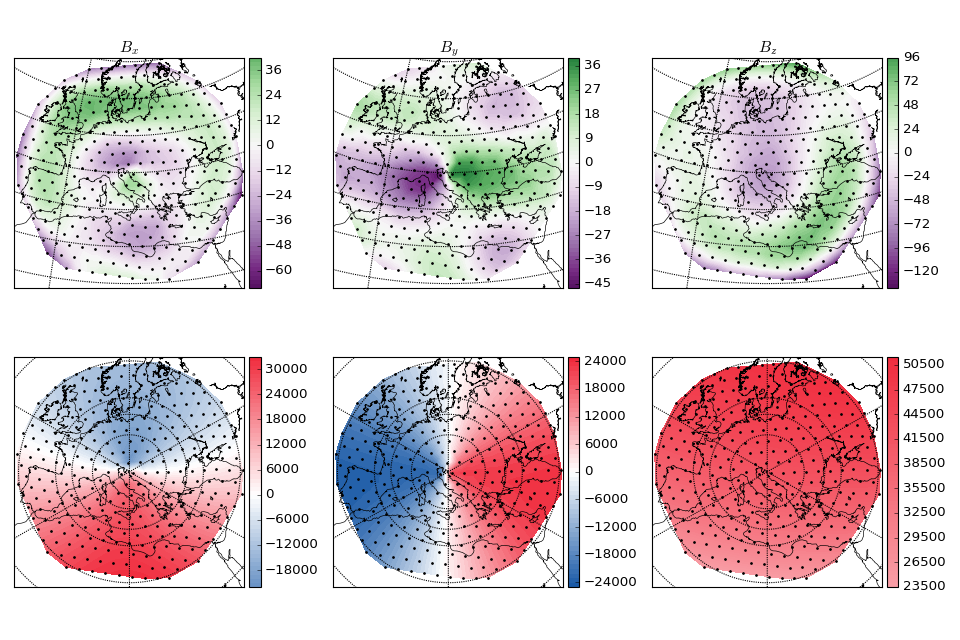

In [60]:
fig, axes = pyplot.subplots(2, 3, figsize=(12,8))

base = Basemap(projection="npaeqd", lon_0 = 0, boundinglat=90-20)
base2 = Basemap(projection="aeqd", lon_0 = 15.0, lat_0=45.0, lat_ts=45.0,
                width=base.xmax, height=base.ymax, resolution="l")
#scha.polar_contour(Bx_r, theta_r, phi_r, theta_0, ax=ax, resolution=200, base=base)
base.colorbar(scha.polar_tricontour(Bx_inv-Bx_r, theta_r, phi_r, theta_0, ax=axes[0][0], base=base, cmap="PRGn"),ax=axes[0][0])
base.colorbar(scha.polar_tricontour(By_inv-By_r, theta_r, phi_r, theta_0, ax=axes[0][1], base=base, cmap="PRGn"),ax=axes[0][1])
base.colorbar(scha.polar_tricontour(Bz_inv-Bz_r, theta_r, phi_r, theta_0, ax=axes[0][2], base=base, cmap="PRGn"),ax=axes[0][2])

axes[0][0].set_title("$B_{x}$")
axes[0][1].set_title("$B_{y}$")
axes[0][2].set_title("$B_{z}$")

base.colorbar(scha.polar_tricontour(Bx_inv, theta_r, phi_r, theta_0, ax=axes[1][0], base=base, cmap=nicebwr), ax=axes[1][0])
base.colorbar(scha.polar_tricontour(By_inv, theta_r, phi_r, theta_0, ax=axes[1][1], base=base, cmap=nicebwr), ax=axes[1][1])
base.colorbar(scha.polar_tricontour(Bz_inv, theta_r, phi_r, theta_0, ax=axes[1][2], base=base, cmap=nicebwr), ax=axes[1][2])

for ax in axes[0]:
    base2.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base2.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)
    
for ax in axes[1]:
    base.drawmeridians(numpy.arange(0, 360, 60), latmax=90, ax=ax, color="black")
    base.drawparallels(numpy.linspace(0, 90, 15), ax=ax, color="black")
    base2.drawcoastlines(ax=ax, linewidth=0.6)
    base.scatter(numpy.rad2deg(phi_r),90-numpy.rad2deg(theta_r),s=2, color="black",latlon=True,ax=ax)

fig.tight_layout()
pyplot.show(fig)